In [4]:
from kurtogram import fast_kurtogram
import numpy as np
import pandas as pd

from freq_tools import generateFFT
from scipy import signal as sig

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (15, 4)
%matplotlib inline

In [56]:
file = pd.read_csv("b30hz0.csv", skiprows=20, header=None)
data = []
sensor_num = 8
file.shape
for i in range(sensor_num):
    data.append(file[i].ravel())
data = np.array(data)
data.shape

(4, 88301)

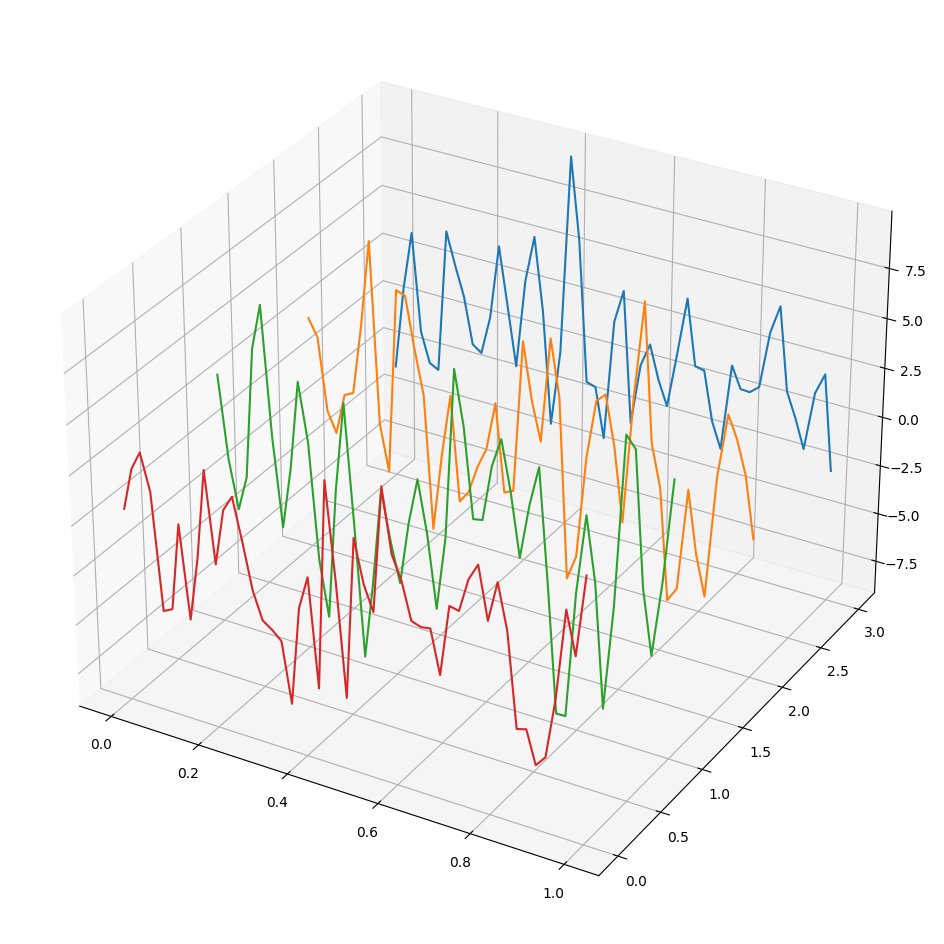

In [48]:
from mpl_toolkits.mplot3d import Axes3D

x=[]
y=[]
z=[]
length = 50
for i in range(sensor_num):
    x.append(np.linspace(0, 1, length))
    y.append(np.ones_like(x[i])*i)
    z.append(data[i][:length])

fig = plt.figure(figsize=(16, 12))
ax1 = plt.axes(projection='3d')

for i in reversed(range(sensor_num)):
    ax1.plot(x[i], y[i], z[i])
plt.savefig("raw_signal.png")
plt.show()

In [49]:
data = np.genfromtxt('aoyu_example_data.txt',skip_header=23,delimiter='\n')

In [50]:
samplingRate = 1e3
speed = 1000/60

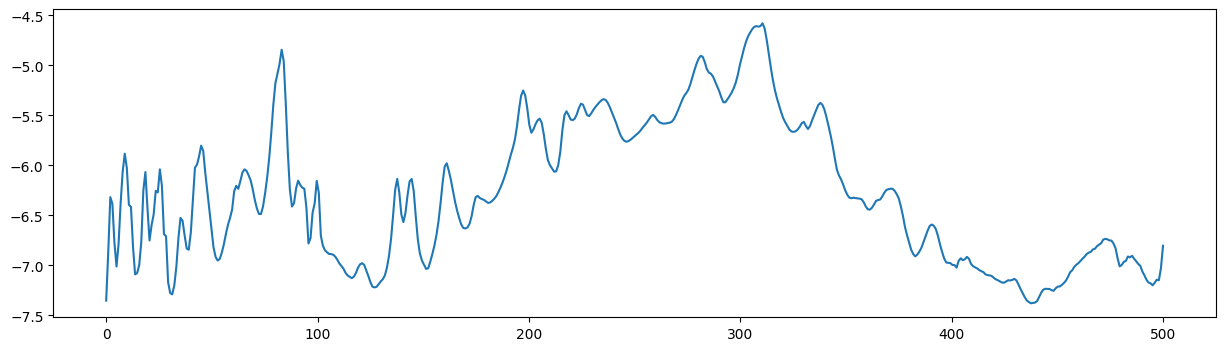

In [51]:
plt.rcParams['figure.figsize'] = (15, 4)
fftFreqs, fftAmps, rawSignal = generateFFT(data,
                                          samplingRate=samplingRate,
                                          nPerSeg=512*2,
                                          averaged=True)
plt.plot(fftFreqs,np.log10(fftAmps))


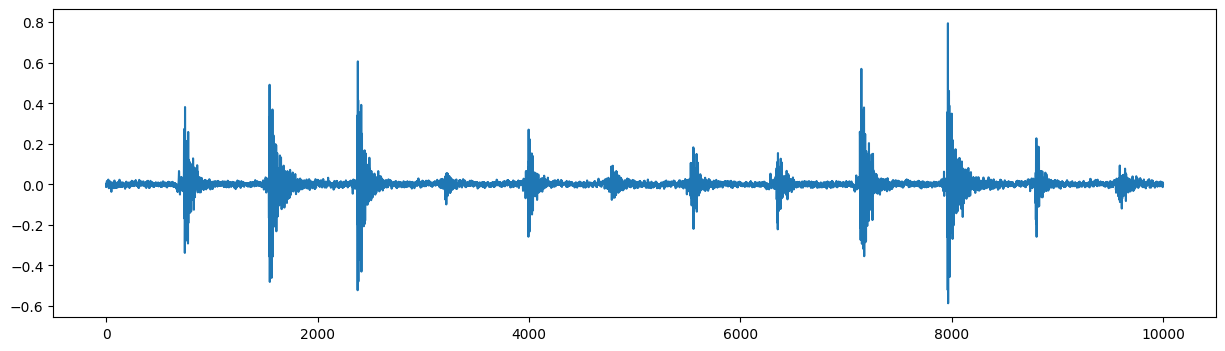

In [52]:
plt.plot(data[:10000])
plt.savefig("raw_signal2.png")
plt.show()

In [20]:
Kwav, Level_w, freq_w, c = fast_kurtogram(data,samplingRate,nlevel=6)

Max Level: 4.584962500721156
Freq: 10.854166666666668
Fs: 1000.0
Max Kurtosis: 90.56378979395683
Bandwidth: 20.833333333333336


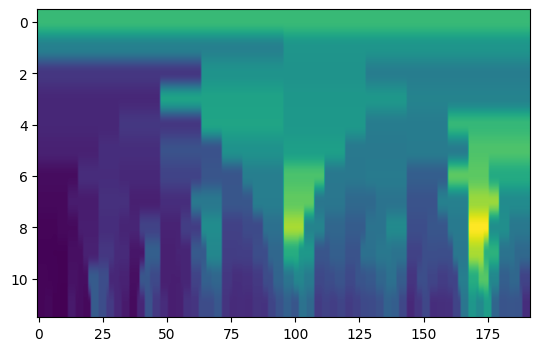

In [21]:
plt.imshow(np.clip(Kwav,0,np.inf),aspect=10)

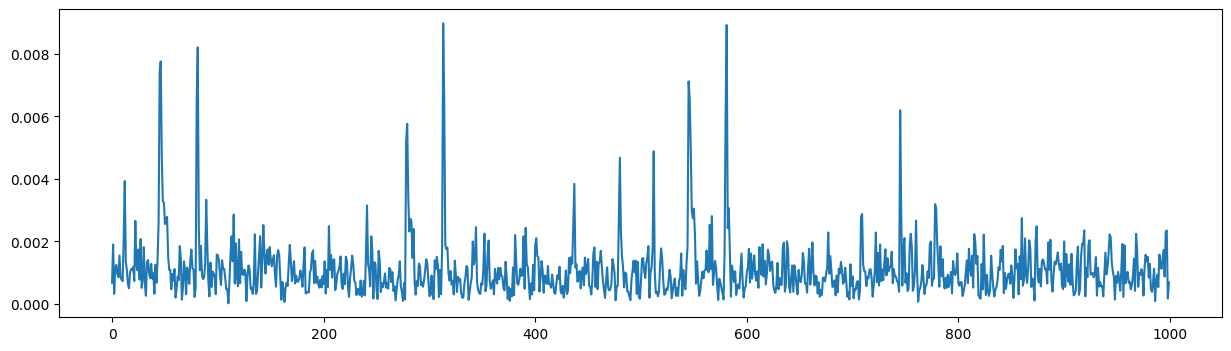

In [22]:
plt.plot(np.abs(c[:1000]))
plt.show()

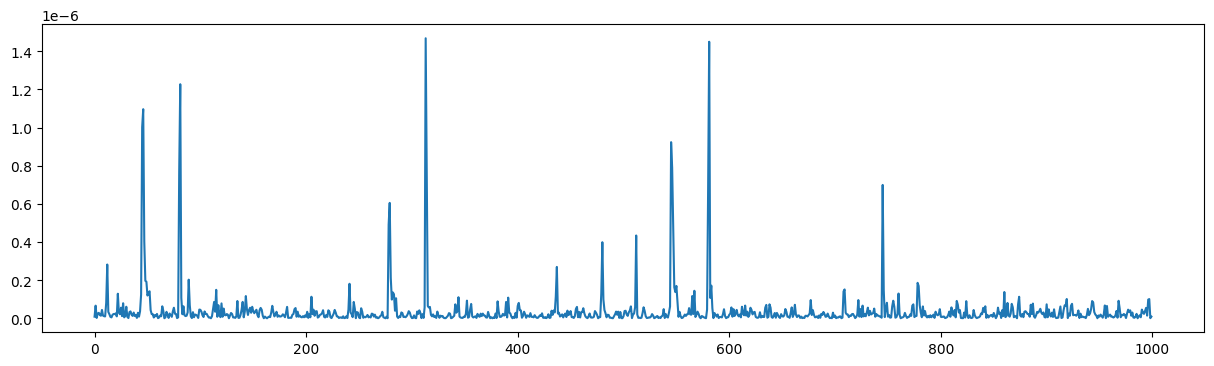

In [23]:
newData = np.abs(c)**2

b_low,a_low = sig.butter(1,10*speed,fs=samplingRate)
b_high,a_high = sig.butter(1,speed,fs=samplingRate)

newData = sig.lfilter(b_low,a_low,newData)
newData = sig.lfilter(b_high,a_high,newData)


plt.plot(newData[:1000])
plt.show()


In [25]:
fftFreqs, fftAmps = sig.welch(newData.flatten(), fs=int(samplingRate), nperseg=1024)
newData.shape

(79142, 1)

In [26]:
fftFreqs, fftAmps

(array([  0.       ,   0.9765625,   1.953125 ,   2.9296875,   3.90625  ,
          4.8828125,   5.859375 ,   6.8359375,   7.8125   ,   8.7890625,
          9.765625 ,  10.7421875,  11.71875  ,  12.6953125,  13.671875 ,
         14.6484375,  15.625    ,  16.6015625,  17.578125 ,  18.5546875,
         19.53125  ,  20.5078125,  21.484375 ,  22.4609375,  23.4375   ,
         24.4140625,  25.390625 ,  26.3671875,  27.34375  ,  28.3203125,
         29.296875 ,  30.2734375,  31.25     ,  32.2265625,  33.203125 ,
         34.1796875,  35.15625  ,  36.1328125,  37.109375 ,  38.0859375,
         39.0625   ,  40.0390625,  41.015625 ,  41.9921875,  42.96875  ,
         43.9453125,  44.921875 ,  45.8984375,  46.875    ,  47.8515625,
         48.828125 ,  49.8046875,  50.78125  ,  51.7578125,  52.734375 ,
         53.7109375,  54.6875   ,  55.6640625,  56.640625 ,  57.6171875,
         58.59375  ,  59.5703125,  60.546875 ,  61.5234375,  62.5      ,
         63.4765625,  64.453125 ,  65.4296875,  66.